# <font color = lightcoral>Inference Testing
>    
### <font color = red> Non-Overlapping Windows

> From transformer models
>

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 4 Key Files

In [ ]:
# import pandas as pd
# import time

# ################################## Part 1: Parsed Raw File ###################################

# parsed_raw_file_path = os.path.join(base_dir,'/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/09.20240704_parsed_bgl/BGL.log_structured.csv')

# # Read the CSV file
# parsed_raw_file_path = pd.read_csv(parsed_raw_file_path)

# # Section 1: Preview
# print("\n" + "*"*100)
# print("********************** Part1 1: Parsed Raw File ******************************************")
# print("*"*100 + "\n")
# display(parsed_raw_file_path.head())

# ######################### Part 2: Encoded File with Feature for Model Training  ######################

# print("\n" + "*"*100)
# print("********************** Part 2:  Input Data with Features ******************************************")
# print("*"*100 + "\n")

# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/12.20240709_More_New_Features/01.Full_Base'
# encoded_feature_input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"

# # Load the parquet file
# encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)

# # Display the head of the DataFrame
# display(encoded_feature_input_file_df.iloc[:, :20].head())


# ######################### Part 3: Event_ID to Template Mapping  #######################################


# print("\n" + "*"*100)
# print("********************** Part 3: Event_ID to Template Mapping ******************************************")
# print("*"*100 + "\n")

# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/13.20240711_Events_Mapping_Done_Prior'

# eventid_template_file = f"{data_dir}/20240711_Template_to_EventID_Mapping_v1.00.csv"

# # Read the CSV file
# eventid_template_df = pd.read_csv(eventid_template_file)

# display(eventid_template_df.head())

# ######################### Part 4: Event_ID to Encoding Mapping  #######################################

# print("\n" + "*"*100)
# print("********************** Part 4:  Event_ID to Encoding Mapping ******************************************")
# print("*"*100 + "\n")


# eventid_encoding_file = f"{data_dir}/20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"

# # Read the CSV file
# eventid_encoding_df = pd.read_csv(eventid_encoding_file)

# # print("*"*100 + "\n")
# display(eventid_encoding_df.head())

---

# <font color = tomato> Model Eval from saved model (#72)
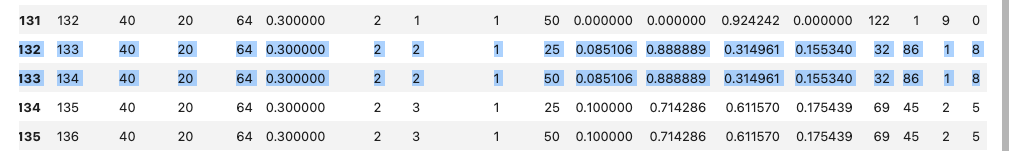

# <font color = gold> Inference Works! --> Two Shots (Save and Test)

## <font color = blue> Part 1. Generate and Save the Test File
### <font color = tomato> One Time Only --> DONE

In [2]:
# import os
# import pandas as pd
# import numpy as np
# import random
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
# from datetime import datetime

# # Parameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
# input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
# output_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'

# # Generate timestamp and serial number
# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# serial_number = "0001"  # You can increment this for each run
# file_prefix = f"{timestamp}_non_overlap_full_test"

# # Required parameters
# max_events = 40
# input_length = 20
# gap = 2
# prediction_period = 1
# test_size = 0.2
# shuffle = False
# random_seed = 42

# # Set random seed for reproducibility
# np.random.seed(random_seed)
# random.seed(random_seed)

# # Data Preprocessing
# df = pd.read_parquet(input_file)

# selected_columns = ['time_start_int', 'Class', 'unique_events', 'most_frequent_event', 'transitions', 'entropy', 
#                     'hour_of_day', 'day_of_week', 'event_count', 'top_event_frequency', 'prev_event_count', 
#                     'transition_rate', 'high_transition_rate', 'prev_entropy', 'entropy_change', 
#                     'rolling_event_count', 'rolling_unique_event_count']
# event_id_columns = [col for col in df.columns if col.startswith('EventId_')]

# df[event_id_columns].replace(-1, 0, inplace=True)

# scaler = StandardScaler()
# numerical_features = ['unique_events', 'transitions', 'entropy', 'hour_of_day', 'day_of_week', 'event_count', 
#                       'top_event_frequency', 'prev_event_count', 'transition_rate', 'prev_entropy', 
#                       'entropy_change', 'rolling_event_count', 'rolling_unique_event_count']
# df[selected_columns[2:]] = scaler.fit_transform(df[selected_columns[2:]])

# label_encoder = LabelEncoder()
# df['most_frequent_event'] = label_encoder.fit_transform(df['most_frequent_event'])

# pca = PCA(n_components=max_events)
# event_id_pca = pca.fit_transform(df[event_id_columns])
# event_id_pca_df = pd.DataFrame(event_id_pca, columns=[f'EventId_PCA_{i+1}' for i in range(max_events)])

# df_reduced = pd.concat([df[selected_columns], event_id_pca_df], axis=1)

# def create_sequences(data, time_index_col, feature_cols, target_col, input_length, gap=2, prediction_period=1):
#     sequences = []
#     targets = []
    
#     start_idx = 0
#     total_length = len(data)
#     while start_idx + input_length + gap + prediction_period <= total_length:
#         end_idx = start_idx + input_length
#         sequence = data[feature_cols].iloc[start_idx:end_idx].values
#         target = data[target_col].iloc[end_idx + gap:end_idx + gap + prediction_period].values[0]
#         sequences.append(sequence)
#         targets.append(target)
#         start_idx = end_idx + gap + prediction_period
    
#     return np.array(sequences), np.array(targets)

# feature_cols = [col for col in df_reduced.columns if col != 'Class']
# target_col = 'Class'

# X, y = create_sequences(df_reduced, 'time_start_int', feature_cols, target_col, input_length=input_length, gap=gap, prediction_period=prediction_period)

# _, X_test, _, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=random_seed)

# # Save the test data
# np.save(f"{output_dir}/{file_prefix}_X_test.npy", X_test)
# np.save(f"{output_dir}/{file_prefix}_y_test.npy", y_test)

# print(f"Test data saved to {output_dir}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_test shape: {y_test.shape}")
# print(f"File prefix: {file_prefix}")

## <font color = blue> Part 2. Load the Test File and Evaluate the Model

In [3]:
import os
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from datetime import datetime
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
inference_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'

model_folder_path = '/home/ubuntu/efs-w210-capstone-ebs/04B.Local_Model_Files/20240713_Non_Overlapping_Consl_180_FINAL'
trained_model_file = f"{model_folder_path}/20240712_Transformers_Non_Overlapping_run_133_of_180.pt"

# File prefix (should match the one used in Part 1)
file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with the actual prefix from Part 1

# Model parameters
input_length = 20
hidden_size = 64
dropout = 0.3
num_layers = 2

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# Drop the first column from X_test
X_test = X_test[:, :, 1:]

# Load the original parquet file with sequence mapping
input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_mapping_master_FINAL.parquet"
original_df = pd.read_parquet(input_file)

# Identify the first instance where Train_Test is 'Test'
seq_start = original_df[original_df['Train_Test'] == 'Test'].iloc[0]['Seq_Num']

# Transformer Model Definition
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.5):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.pos_encoder = nn.Embedding(input_length, hidden_size)
        self.transformer = nn.Transformer(hidden_size, nhead=4, num_encoder_layers=num_layers, num_decoder_layers=num_layers, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.embedding(x)
        positions = torch.arange(0, x.size(1), device=x.device).unsqueeze(0)
        x = x + self.pos_encoder(positions)
        x = self.transformer(x, x)
        x = self.fc(x[:, -1, :])
        return x

# Model Evaluation
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

input_size = X_test.shape[2]
model = TransformerModel(input_size, hidden_size, num_layers, 1, dropout)
model.load_state_dict(torch.load(trained_model_file))

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_outputs = torch.sigmoid(test_outputs)
    test_outputs = test_outputs.cpu().numpy()

    test_preds = (test_outputs > 0.5).astype(int)

# Create DataFrame for tracking
tracking_data = []

for i in range(len(test_preds)):
    total_seq_start = seq_start + i * 23
    total_seq_end = total_seq_start + 23 - 1
    source_seq_start = total_seq_start
    source_seq_end = source_seq_start + input_length - 1
    gap_seq_start = source_seq_end + 1
    gap_seq_end = gap_seq_start + 1
    prediction_seq_start = total_seq_end - 1
    prediction_seq_end = total_seq_end
    
    tracking_data.append([
        total_seq_start, total_seq_end, source_seq_start, source_seq_end,
        gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
        test_preds[i][0], y_test[i]
    ])

tracking_df = pd.DataFrame(tracking_data, columns=[
    "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
    "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
    "Predicted", "Actual"
])

# Merge with original data
merged_df = tracking_df.merge(original_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

# Save the DataFrame to a CSV file
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_file = f"{inference_dir}/{timestamp}_non_overlapping_inference_mapping_results.csv"
merged_df.to_csv(output_file, index=False)

print(f"Tracking file saved to {output_file}")

# Display the first 20 columns of all rows in the new DataFrame
pd.set_option('display.max_columns', 20)
display(merged_df.iloc[:, :20])

# Calculate and print metrics
conf_matrix = confusion_matrix(y_test_tensor.cpu().numpy(), test_preds)
precision = precision_score(y_test_tensor.cpu().numpy(), test_preds, zero_division=0)
recall = recall_score(y_test_tensor.cpu().numpy(), test_preds, zero_division=0)
accuracy = accuracy_score(y_test_tensor.cpu().numpy(), test_preds)
f1 = f1_score(y_test_tensor.cpu().numpy(), test_preds, zero_division=0)
tn, fp, fn, tp = conf_matrix.ravel()

print("\nEvaluation Results:")
print(f"Precision={precision:.6f}, Recall={recall:.6f}, Accuracy={accuracy:.6f}, F1={f1:.6f}, TN={tn}, FP={fp}, FN={fn}, TP={tp}")

Tracking file saved to /home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/20240715_145634_non_overlapping_inference_mapping_results.csv


,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day
0,11615,11637,11615,11634,11635,11636,11636,11637,0,0.0,11615,Test,2005-11-08 16:10:00,45506,0,1,68,0,0.000000,16
1,11638,11660,11638,11657,11658,11659,11659,11660,0,0.0,11638,Test,2005-11-08 23:00:00,45588,0,1,231,0,0.000000,23
2,11661,11683,11661,11680,11681,11682,11682,11683,1,0.0,11661,Test,2005-11-09 12:50:00,45754,0,1,231,0,0.000000,12
3,11684,11706,11684,11703,11704,11705,11705,11706,1,0.0,11684,Test,2005-11-09 18:45:00,45825,0,2,108,1,0.348832,18
4,11707,11729,11707,11726,11727,11728,11728,11729,1,0.0,11707,Test,2005-11-10 07:20:00,45976,0,5,201,15,0.419213,7
5,11730,11752,11730,11749,11750,11751,11751,11752,1,0.0,11730,Test,2005-11-10 19:05:00,46117,1,38,399,111,1.575391,19
6,11753,11775,11753,11772,11773,11774,11774,11775,0,0.0,11753,Test,2005-11-11 04:45:00,46233,0,5,399,13,1.073979,4
7,11776,11798,11776,11795,11796,11797,11797,11798,0,0.0,11776,Test,2005-11-11 10:45:00,46305,1,3,912,2,1.098612,10
8,11799,11821,11799,11818,11819,11820,11820,11821,0,0.0,11799,Test,2005-11-11 17:50:00,46390,0,1,231,0,0.000000,17
9,11822,11844,11822,11841,11842,11843,11843,11844,0,0.0,11822,Test,2005-11-12 14:45:00,46641,0,1,976,0,0.000000,14



Evaluation Results:
Precision=0.085106, Recall=0.888889, Accuracy=0.314961, F1=0.155340, TN=32, FP=86, FN=1, TP=8


---

## <font color = grey> Data Check

In [4]:
# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# Drop the first column from X_test
X_test = X_test[:, :, 1:]

# Convert to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# View a few records from X_test and y_test (NumPy arrays)
print("Sample records from X_test (NumPy array):")
print(X_test[:3])
print("\nShape of X_test:", X_test.shape)

print("\nSample records from y_test (NumPy array):")
print(y_test[:10])
print("\nShape of y_test:", y_test.shape)

# # View a few records from X_test_tensor and y_test_tensor (PyTorch tensors)
# print("\nSample records from X_test_tensor (PyTorch tensor):")
# print(X_test_tensor[:3])
# print("\nShape of X_test_tensor:", X_test_tensor.shape)

# print("\nSample records from y_test_tensor (PyTorch tensor):")
# print(y_test_tensor[:10])
# print("\nShape of y_test_tensor:", y_test_tensor.shape)

# # Display some basic statistics
# print("\nBasic statistics:")
# print(f"Total samples: {len(y_test)}")
# print(f"Positive samples: {np.sum(y_test)}")
# print(f"Negative samples: {len(y_test) - np.sum(y_test)}")
# print(f"Positive ratio: {np.sum(y_test) / len(y_test):.2%}")

# ... (rest of the evaluation code)

Sample records from X_test (NumPy array):
[[[-3.64159959e-01  1.10000000e+01 -7.27108731e-02 ... -6.03386704e+01
   -7.63430651e+01  2.76562845e+01]
  [ 1.04469389e-01  8.00000000e+01 -5.70640070e-02 ... -1.03639051e+02
   -1.36116477e+02  1.60575016e+01]
  [-3.64159959e-01  4.10000000e+01 -7.27108731e-02 ... -6.49000767e+01
   -1.05809419e+02 -6.46902538e+01]
  ...
  [ 4.16888954e-01  8.00000000e+01 -4.83713036e-02 ... -3.95672762e+01
   -1.02867421e+02 -1.92895632e+02]
  [-3.64159959e-01  1.68000000e+02 -7.27108731e-02 ... -3.82875507e+01
   -4.59029017e+01  3.35630721e+01]
  [-3.64159959e-01  5.00000000e+01 -7.27108731e-02 ... -3.82875507e+01
   -4.59029017e+01  3.35630721e+01]]

 [[-3.64159959e-01  5.00000000e+01 -7.27108731e-02 ...  2.41506060e+02
    2.91421308e+02 -5.57249175e+01]
  [-3.64159959e-01  5.00000000e+01 -7.27108731e-02 ...  2.60404889e+02
    3.66422948e+02  1.13573195e+02]
  [ 4.94697265e+00  1.47000000e+02  5.52345747e-03 ... -3.82875507e+01
   -4.59029017e+01  3.3

* 127: This is the number of sequences or samples in your test set. Each of these represents a distinct input to your model.

* 20: This is the length of each sequence, also known as the time steps or input_length. It means that each sequence consists of 20 consecutive time points or events.

* 55: This is the number of features for each time point in the sequence. These features include your derived features and the PCA-reduced EventID features.

In [5]:
# View a few records from X_test_tensor and y_test_tensor (PyTorch tensors)
print("\nSample records from X_test_tensor (PyTorch tensor):")
print(X_test_tensor[:3])
print("\nShape of X_test_tensor:", X_test_tensor.shape)

print("\nSample records from y_test_tensor (PyTorch tensor):")
print(y_test_tensor[:10])
print("\nShape of y_test_tensor:", y_test_tensor.shape)



Sample records from X_test_tensor (PyTorch tensor):
tensor([[[-3.6416e-01,  1.1000e+01, -7.2711e-02,  ..., -6.0339e+01,
          -7.6343e+01,  2.7656e+01],
         [ 1.0447e-01,  8.0000e+01, -5.7064e-02,  ..., -1.0364e+02,
          -1.3612e+02,  1.6058e+01],
         [-3.6416e-01,  4.1000e+01, -7.2711e-02,  ..., -6.4900e+01,
          -1.0581e+02, -6.4690e+01],
         ...,
         [ 4.1689e-01,  8.0000e+01, -4.8371e-02,  ..., -3.9567e+01,
          -1.0287e+02, -1.9290e+02],
         [-3.6416e-01,  1.6800e+02, -7.2711e-02,  ..., -3.8288e+01,
          -4.5903e+01,  3.3563e+01],
         [-3.6416e-01,  5.0000e+01, -7.2711e-02,  ..., -3.8288e+01,
          -4.5903e+01,  3.3563e+01]],

        [[-3.6416e-01,  5.0000e+01, -7.2711e-02,  ...,  2.4151e+02,
           2.9142e+02, -5.5725e+01],
         [-3.6416e-01,  5.0000e+01, -7.2711e-02,  ...,  2.6040e+02,
           3.6642e+02,  1.1357e+02],
         [ 4.9470e+00,  1.4700e+02,  5.5235e-03,  ..., -3.8288e+01,
          -4.5903e+01, 